In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
#!/usr/bin/env python
cd /content/drive/My Drive/OAT

/content/drive/My Drive/OAT


In [0]:
%reload_ext rpy2.ipython

In [0]:
%%R
if(!require("dplyr")) install.packages("dplyr")
library('dplyr')
if(!require("lubridate")) install.packages("lubridate")
library("lubridate")
install.packages("astsa")
library("astsa")
install.packages('readxl')
library('readxl')
install.packages("tidyverse")
library("tidyverse")

In [127]:
%%R
#read & process ratios
r<-read_xlsx('R.xlsx', sheet='sheet_1', col_names=TRUE, skip=3, n_max=8)
colnames(r)<-c('y', 'n_a', 'n_ha', 'h_a', 'h_ha', 'p')
r$y <- parse_date_time(r$y, "y")
r$ha_p<-r$n_ha/r$p # clnts in hlth auth/p incrss.. p = 0, d = 1, q = 2
r$a_ha<-r$n_a/r$n_ha # clnts in A/ clnts in hlth auth incrsd , 111
r$a_n<-r$h_a/r$n_a # hrs in comm A/ clnts A incrsd 111
r$h_p_ha<-r$h_ha/r$n_ha
glimpse(r)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: New names:
* `Community A` -> `Community A...2`
* `Health Authority` -> `Health Authority...3`
* `Community A` -> `Community A...4`
* `Health Authority` -> `Health Authority...5`

  warnings.warn(x, RRuntimeWarning)


Observations: 8
Variables: 14
$ y      <dttm> 2012-01-01, 2013-01-01, 2014-01-01, 2015-01-01, 2016-01-01, 2…
$ n_a    <dbl> 1499, 1535, 1570, 1606, 1641, 1679, 1733, 1798
$ n_ha   <dbl> 8020, 8210, 8401, 8589, 8781, 8982, 9231, 9501
$ h_a    <dbl> 23969, 24551, 25206, 25870, 26499, 27049, 28106, 29367
$ h_ha   <dbl> 115625, 118437, 121596, 124798, 127835, 130486, 134121, 137943
$ p      <dbl> 4566769, 4630077, 4707103, 4776388, 4859250, 4922152, 4991687,…
$ NA     <dbl> 0.001756165, 0.001773189, 0.001784750, 0.001798221, 0.00180706…
$ NA     <dbl> 0.1869077, 0.1869671, 0.1868825, 0.1869834, 0.1868808, 0.18692…
$ NA     <dbl> 15.98999, 15.99414, 16.05478, 16.10834, 16.14808, 16.11018, 16…
$ NA     <dbl> 14.41708, 14.42594, 14.47399, 14.52998, 14.55814, 14.52750, 14…
$ ha_p   <dbl> 0.001756165, 0.001773189, 0.001784750, 0.001798221, 0.00180706…
$ a_ha   <dbl> 0.1869077, 0.1869671, 0.1868825, 0.1869834, 0.1868808, 0.18692…
$ a_n    <dbl> 15.98999, 15.99414, 16.05478, 16.10834, 16.14808, 1

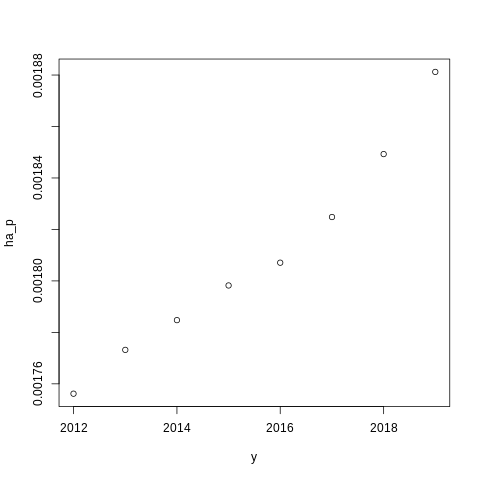

In [152]:
%%R
#visual inspection of a ratio 'ha_p'
s<-r[c('y','ha_p')]
plot(s)

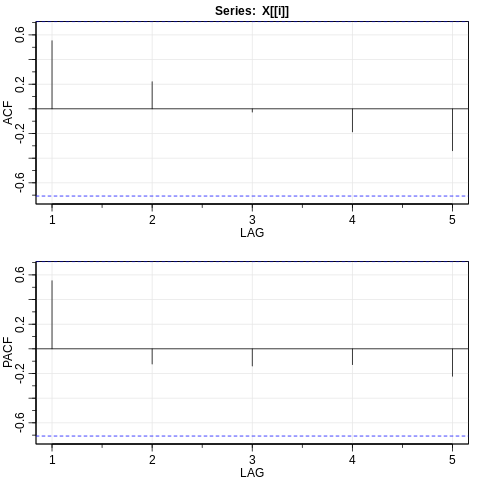

In [153]:
%%R
#finding AR and MA for above ratio
s<-s %>% remove_rownames %>% column_to_rownames(var="y")
acf_df <- lapply(X = s, FUN = acf2)


$pred
Time Series:
Start = 9 
End = 11 
Frequency = 1 
[1] 14.50117 14.48628 14.47992

$se
Time Series:
Start = 9 
End = 11 
Frequency = 1 
[1] 0.02136896 0.03471503 0.03987025



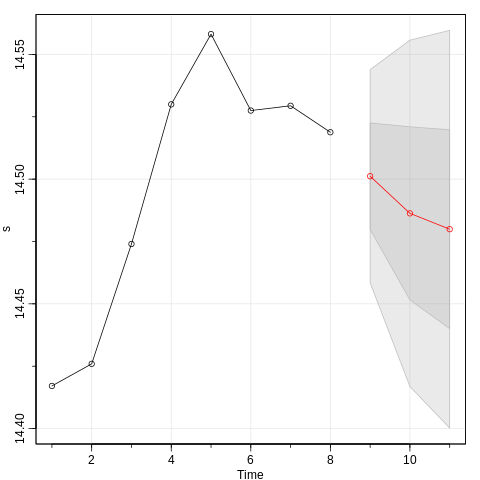

In [122]:
%%R
#forecasting above ratio
sarima.for(s, n.ahead = 3, 2, 0, 0) 